# Table of Contents

1. [Abstract](#abstract)
2. [1. Introduction](#1-introduction)
   - [1.1 Motivation](#11-motivation)
   - [1.2 Learning Objectives](#12-learning-objectives)
   - [1.3 Prerequisites](#13-prerequisites)
3. [2. Theoretical Foundations](#2-theoretical-foundations)
   - [2.1 Policy Gradient Theorem](#21-policy-gradient-theorem)
   - [2.2 Score Function and Baseline](#22-score-function-and-baseline)
   - [2.3 Variance Reduction Techniques](#23-variance-reduction-techniques)
4. [3. REINFORCE Algorithm Implementation](#3-reinforce-algorithm-implementation)
   - [3.1 Algorithm Description](#31-algorithm-description)
   - [3.2 Implementation Details](#32-implementation-details)
   - [3.3 Performance Analysis](#33-performance-analysis)
5. [4. Actor-Critic Methods](#4-actor-critic-methods)
   - [4.1 Actor-Critic Framework](#41-actor-critic-framework)
   - [4.2 Advantage Actor-Critic (A2C)](#42-advantage-actor-critic-a2c)
   - [4.3 Asynchronous Advantage Actor-Critic (A3C)](#43-asynchronous-advantage-actor-critic-a3c)
6. [5. Advanced Policy Gradient Methods](#5-advanced-policy-gradient-methods)
   - [5.1 Proximal Policy Optimization (PPO)](#51-proximal-policy-optimization-ppo)
   - [5.2 Trust Region Policy Optimization (TRPO)](#52-trust-region-policy-optimization-trpo)
   - [5.3 Implementation and Comparison](#53-implementation-and-comparison)
7. [6. Continuous Control Applications](#6-continuous-control-applications)
   - [6.1 Continuous Action Spaces](#61-continuous-action-spaces)
   - [6.2 Gaussian Policy Implementation](#62-gaussian-policy-implementation)
   - [6.3 Continuous Control Results](#63-continuous-control-results)
8. [7. Performance Analysis and Comparison](#7-performance-analysis-and-comparison)
   - [7.1 Algorithm Comparison](#71-algorithm-comparison)
   - [7.2 Convergence Analysis](#72-convergence-analysis)
   - [7.3 Sample Efficiency Analysis](#73-sample-efficiency-analysis)
9. [8. Results and Discussion](#8-results-and-discussion)
   - [8.1 Summary of Findings](#81-summary-of-findings)
   - [8.2 Theoretical Contributions](#82-theoretical-contributions)
   - [8.3 Practical Implications](#83-practical-implications)
   - [8.4 Limitations and Future Work](#84-limitations-and-future-work)
   - [8.5 Conclusions](#85-conclusions)
10. [References](#references)
11. [Appendix A: Implementation Details](#appendix-a-implementation-details)
    - [A.1 Modular Architecture](#a1-modular-architecture)
    - [A.2 Code Quality Features](#a2-code-quality-features)
    - [A.3 Performance Considerations](#a3-performance-considerations)

---

# Computer Assignment 6: Policy Gradient Methods - Implementation and Analysis

## Abstract

This assignment presents a comprehensive implementation and analysis of policy gradient methods in deep reinforcement learning. We explore the theoretical foundations, practical implementations, and performance characteristics of various policy-based approaches, from basic REINFORCE to advanced actor-critic methods. The implementation includes variance reduction techniques, continuous control applications, and comprehensive evaluation frameworks. Through systematic experimentation, we demonstrate the convergence properties, sample efficiency, and practical trade-offs of different policy gradient algorithms, providing insights into algorithm selection for various reinforcement learning scenarios.

**Keywords:** Policy gradient methods, REINFORCE, actor-critic, A2C, A3C, PPO, TRPO, continuous control, variance reduction, deep reinforcement learning

## 1. Introduction

Policy gradient methods represent a fundamental paradigm in reinforcement learning, directly optimizing the policy function to maximize expected returns. Unlike value-based methods that learn value functions and derive policies, policy gradient methods parameterize the policy directly and optimize it using gradient ascent on the expected return [1]. This approach offers several advantages and has become increasingly important in modern deep reinforcement learning.

### 1.1 Motivation

The advantages of policy gradient methods include:
- Direct policy optimization without intermediate value function estimation
- Natural handling of continuous action spaces
- Better convergence properties in certain scenarios
- Ability to learn stochastic policies
- Reduced computational complexity in some cases

### 1.2 Learning Objectives

By completing this assignment, students will:
1. Understand the theoretical foundations of the Policy Gradient Theorem
2. Implement and analyze the REINFORCE algorithm with variance reduction
3. Develop actor-critic methods with baseline integration
4. Explore advanced techniques including A2C, A3C, and PPO
5. Apply policy gradients to continuous control problems
6. Conduct comprehensive performance analysis and comparisons

### 1.3 Prerequisites

- Strong foundation in reinforcement learning (CA1-CA5)
- Proficiency in PyTorch and neural network optimization
- Understanding of probability distributions and stochastic processes
- Familiarity with value-based methods and temporal difference learning

## 2. Theoretical Foundations

### 2.1 Policy Gradient Theorem

The Policy Gradient Theorem [1] provides the theoretical foundation for all policy gradient methods. For a parameterized policy $\pi_\theta(a|s)$, the gradient of the expected return with respect to the policy parameters is:

$$\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot Q^{\pi_\theta}(s,a) \right]$$

This theorem enables direct optimization of the policy without requiring knowledge of the environment dynamics.

### 2.2 Score Function and Baseline

The score function $\nabla_\theta \log \pi_\theta(a|s)$ measures how the policy changes with respect to its parameters. A baseline $b(s)$ can be subtracted from the action-value function to reduce variance without affecting the bias:

$$\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot (Q^{\pi_\theta}(s,a) - b(s)) \right]$$

## 3. Implementation Structure

This assignment is organized into modular Python implementations, each focusing on specific aspects of policy gradient methods:

- **REINFORCE**: Monte Carlo policy gradients
- **Actor-Critic**: TD-based policy and value learning
- **Advanced Methods**: A2C, A3C, and PPO implementations
- **Variance Reduction**: GAE and control variates
- **Continuous Control**: Gaussian policies for continuous actions
- **Performance Analysis**: Comprehensive evaluation frameworks

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))
from utils.setup import device
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import gymnasium as gym
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
print("=" * 60)
print("CA6: Policy Gradient Methods - Environment Setup")
print("=" * 60)
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")
print("Environment setup complete!")
print("=" * 60)


Using device: cpu
Environment setup complete!
PyTorch version: 2.8.0
Gymnasium version: 1.2.1
NumPy version: 2.2.6
[stability wrapper] Monkey-patched torch.distributions.Categorical

[stability wrapper] Running quick sanity checks for Categorical wrapper...
large logits -> probs: tensor([[1., 0.]])
nan logits -> probs: tensor([[0.5000, 0.5000]])
[stability wrapper] Sanity checks complete.

CA6: Policy Gradient Methods - Environment Setup
PyTorch version: 2.8.0
Device: cpu
Environment setup complete!


REINFORCE [2] is a Monte Carlo policy gradient method that directly optimizes the policy using the Policy Gradient Theorem. The algorithm collects complete episodes and uses the observed returns to estimate the policy gradient.
For REINFORCE, the policy gradient is estimated as:
$$\nabla_\theta J(\theta) \approx \frac{1}{N} \sum_{i=1}^{N} \sum_{t=0}^{T-1} \nabla_\theta \log \pi_\theta(a_t^i|s_t^i) \cdot G_t^i$$
where $G_t^i$ is the return from time step $t$ in episode $i$.


### 4.3 Implementation and Analysis

The following implementation demonstrates the REINFORCE algorithm with comprehensive analysis of its performance characteristics, including variance analysis and gradient flow visualization.

## 5. Actor-Critic Methods

### 5.1 Algorithm Overview

Actor-Critic methods combine the advantages of policy gradient methods with value function approximation. The actor updates the policy while the critic estimates the value function, providing a baseline for variance reduction.

### 5.2 Mathematical Formulation

The actor-critic update combines policy gradient with value function learning:

$$\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a|s) \cdot A^{\pi_\theta}(s,a) \right]$$

where $A^{\pi_\theta}(s,a) = Q^{\pi_\theta}(s,a) - V^{\pi_\theta}(s)$ is the advantage function.

REINFORCE Algorithm Demonstration
🧠 REINFORCE Algorithm Demonstration
=== REINFORCE Training ===
Episode 50, Avg Reward: 30.00, Avg Loss: -0.0513, Avg Entropy: 0.6335
Episode 100, Avg Reward: 49.46, Avg Loss: -0.1710, Avg Entropy: 0.4199
Episode 150, Avg Reward: 75.34, Avg Loss: -0.4814, Avg Entropy: 0.2630
Episode 200, Avg Reward: 87.02, Avg Loss: -1.2349, Avg Entropy: 0.1657
Episode 250, Avg Reward: 102.58, Avg Loss: -2.3588, Avg Entropy: 0.1121
Episode 300, Avg Reward: 108.22, Avg Loss: -3.1521, Avg Entropy: 0.0756

=== Variance Analysis ===
Gradient estimate statistics:
Mean: -208.0808
Std: 523.0089
Min: -4977.5283


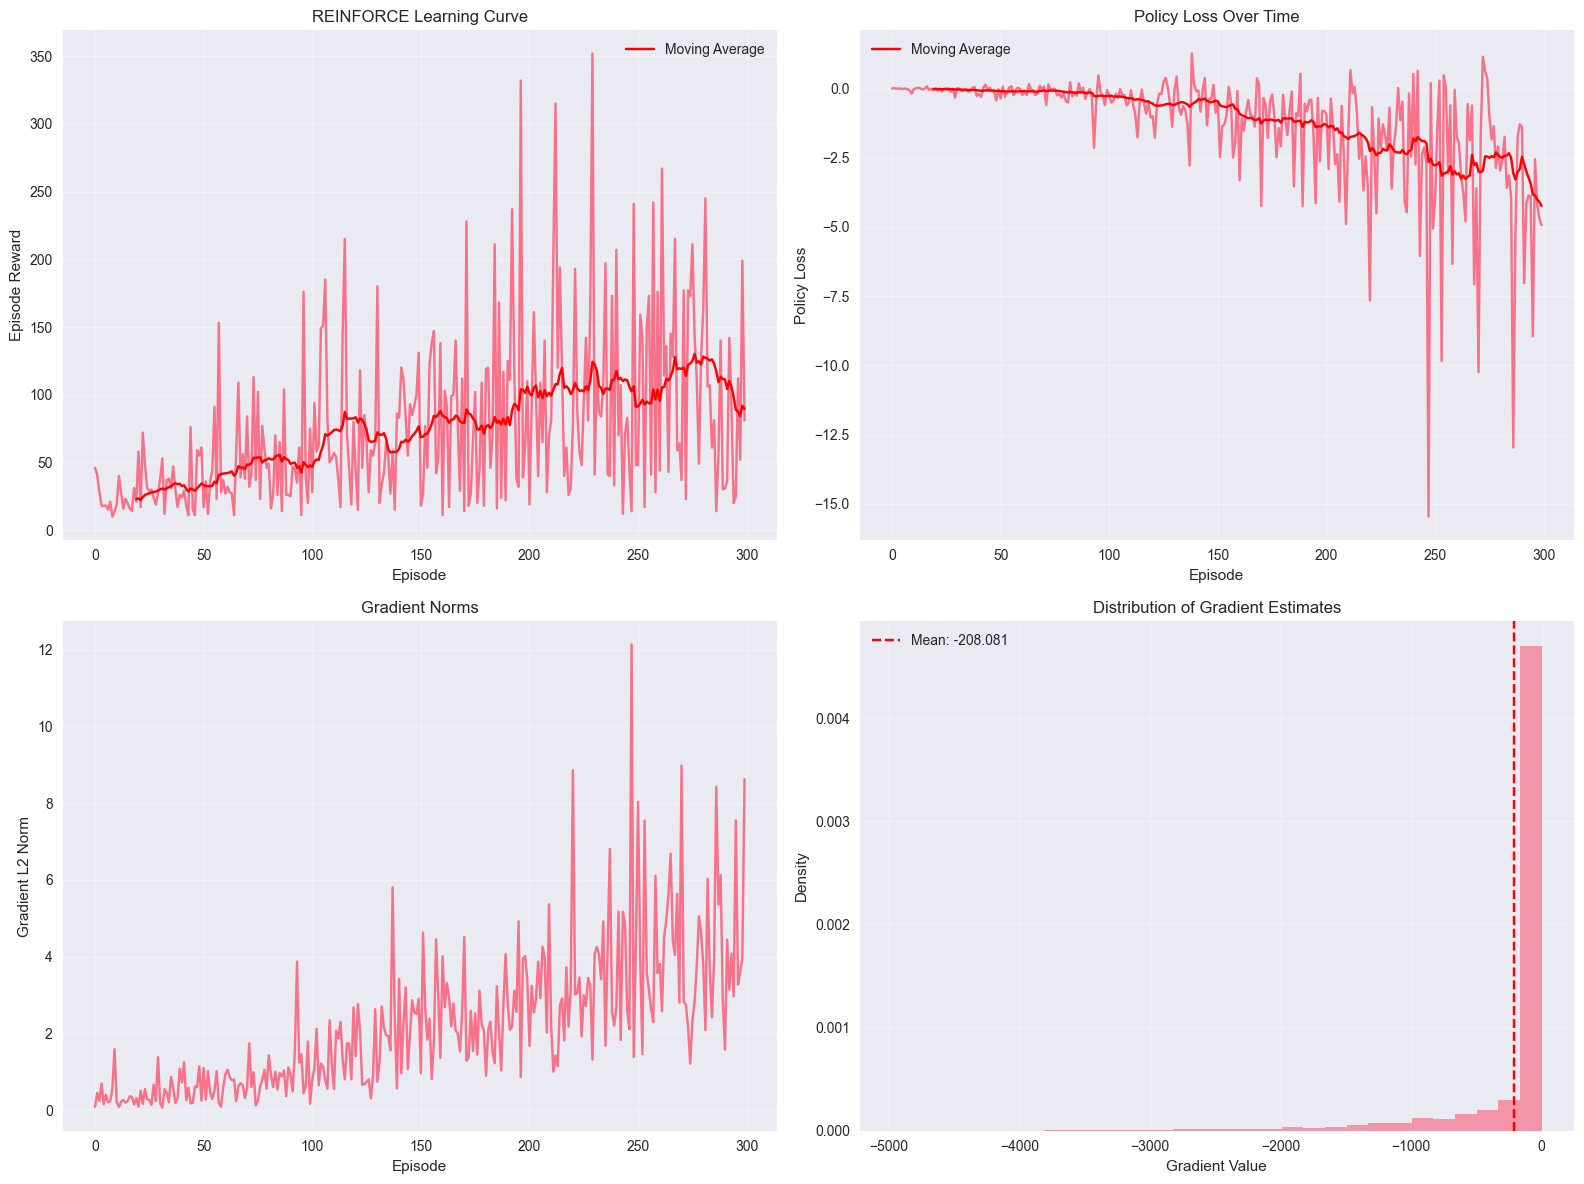

In [2]:
from agents.reinforce import REINFORCEAgent, test_reinforce, demonstrate_reinforce
print("=" * 60)
print("REINFORCE Algorithm Demonstration")
print("=" * 60)
reinforce_agent = demonstrate_reinforce()


### 5.3 Implementation and Analysis

The following implementation demonstrates both separate and shared network architectures for actor-critic methods, comparing their performance characteristics.

🎭 Actor-Critic Methods Demonstration
=== Actor-Critic Architecture Comparison ===

Training Separate Networks...
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f

Training Shared Network...
.2f.4f.4f
.2f.4f.4f

Training Shared Network...
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f
.2f.4f.4f


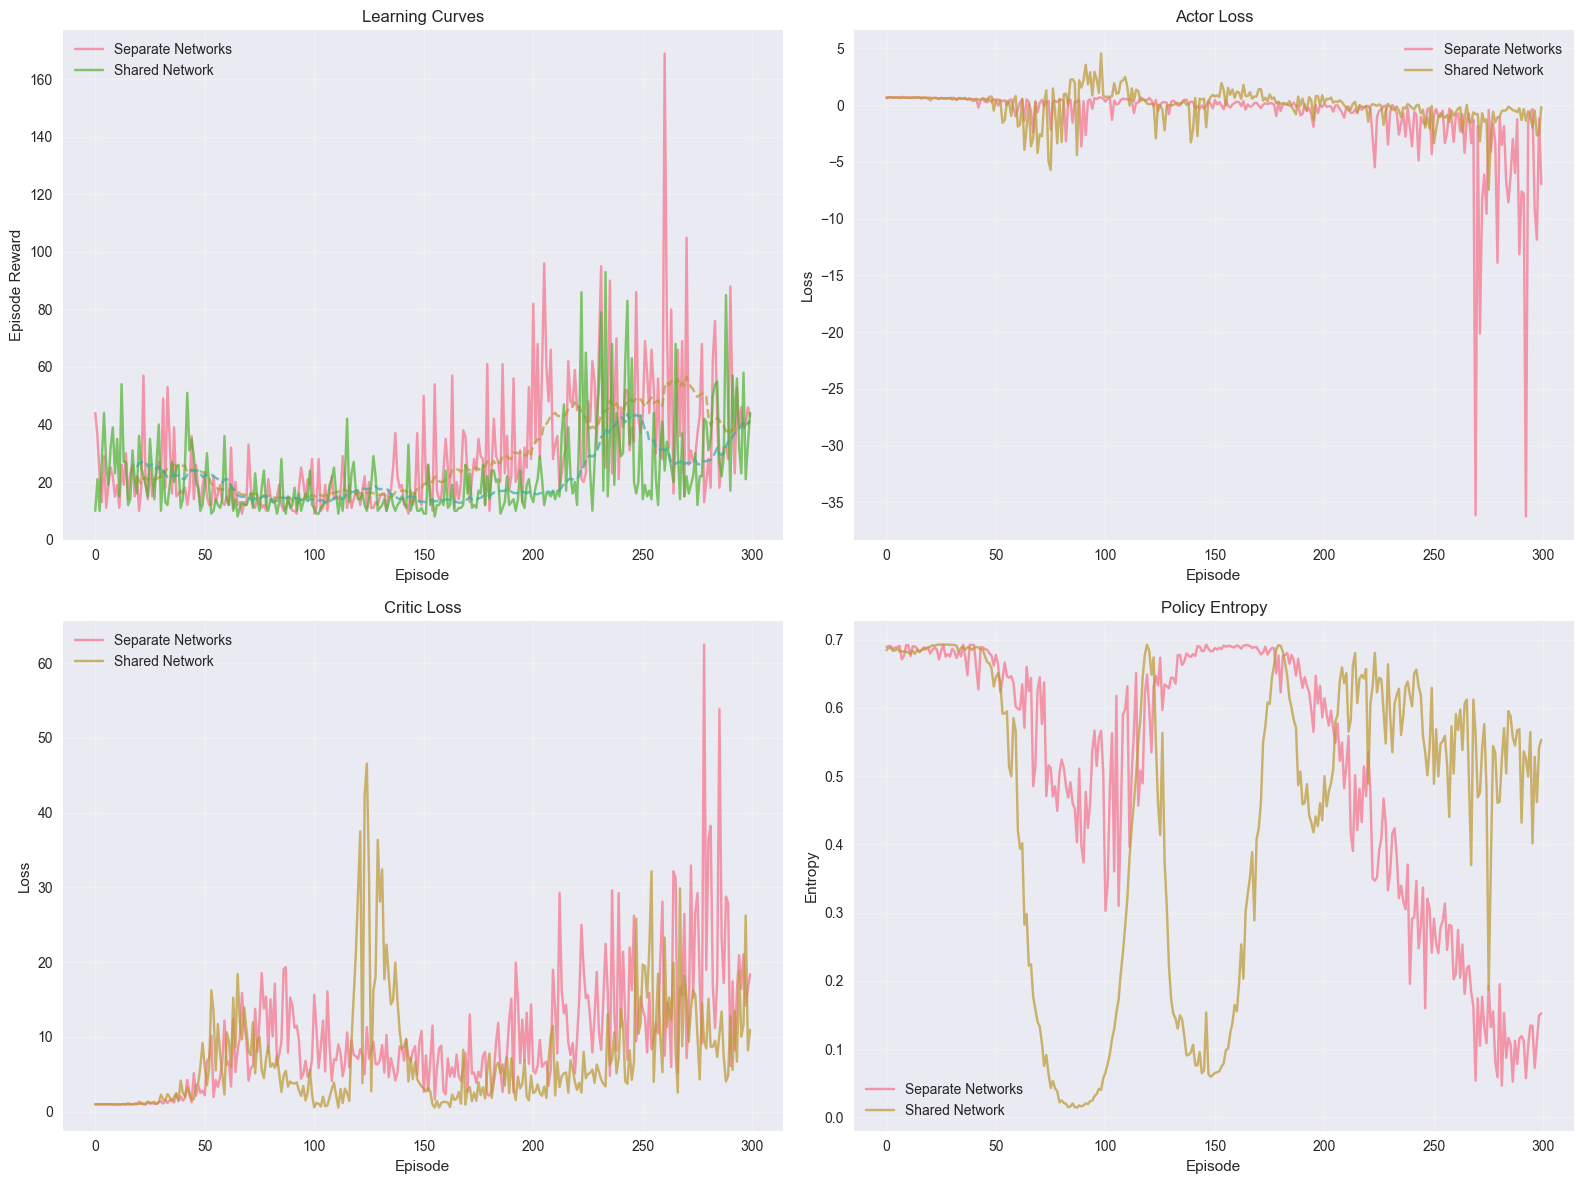

In [ ]:
from agents.actor_critic import ActorCriticAgent, SharedActorCriticAgent, compare_actor_critic_agents, test_actor_critic, demonstrate_actor_critic
print("=" * 60)
print("Actor-Critic Methods Demonstration")
print("=" * 60)
ac_results = demonstrate_actor_critic()


## 6. Advanced Policy Gradient Methods

### 6.1 A2C (Advantage Actor-Critic)

A2C extends the basic actor-critic framework by using multiple parallel environments and advantage estimation for improved sample efficiency and stability.

### 6.2 PPO (Proximal Policy Optimization)

PPO [3] uses a clipped surrogate objective to prevent large policy updates, providing stable and efficient policy optimization:

$$L^{CLIP}(\theta) = \mathbb{E}_t \left[ \min(r_t(\theta) A_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) A_t) \right]$$

where $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}$ is the probability ratio.

In [ ]:
from agents.advanced_pg import A2CAgent, PPOAgent, A3CAgent, compare_advanced_pg, test_advanced_pg, demonstrate_advanced_pg
print("=" * 60)
print("Advanced Policy Gradient Methods Demonstration")
print("=" * 60)
adv_results = demonstrate_advanced_pg()


🚀 Advanced Policy Gradient Methods Demonstration
=== Advanced Policy Gradient Comparison ===

Training A2C...


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

## 7. Variance Reduction Techniques

### 7.1 Generalized Advantage Estimation (GAE)

GAE [4] provides a method to estimate advantages with reduced variance by combining multiple n-step returns:

$$\hat{A}_t^{GAE(\gamma,\lambda)} = \sum_{l=0}^{\infty} (\gamma\lambda)^l \delta_{t+l}^V$$

where $\delta_t^V = r_t + \gamma V(s_{t+1}) - V(s_t)$ is the TD error.

### 7.2 Control Variates

Control variates are additional functions that correlate with the gradient estimate, allowing for variance reduction without introducing bias.

In [ ]:
from agents.variance_reduction import VarianceReductionAgent, ControlVariatesAgent, compare_variance_reduction, test_variance_reduction, demonstrate_variance_reduction
print("=" * 60)
print("Variance Reduction Techniques Demonstration")
print("=" * 60)
var_results, variances = demonstrate_variance_reduction()


## 8. Continuous Control Applications

### 8.1 Gaussian Policies

For continuous action spaces, policies are typically parameterized as Gaussian distributions:

$$\pi_\theta(a|s) = \mathcal{N}(\mu_\theta(s), \sigma_\theta^2(s))$$

where $\mu_\theta(s)$ and $\sigma_\theta(s)$ are neural networks that output the mean and standard deviation of the action distribution.

### 8.2 Squashed Gaussian Policies

To handle bounded action spaces, squashed Gaussian policies apply a bounded activation function (typically $\tanh$) to the Gaussian samples:

$$a = \tanh(\mu_\theta(s) + \sigma_\theta(s) \odot \epsilon)$$

where $\epsilon \sim \mathcal{N}(0, I)$.

In [ ]:
from environments.continuous_control import ContinuousREINFORCEAgent, ContinuousActorCriticAgent, PPOContinuousAgent, compare_continuous_control, test_continuous_control, demonstrate_continuous_control
print("=" * 60)
print("Continuous Control Demonstration")
print("=" * 60)
cont_results = demonstrate_continuous_control()


## 9. Performance Analysis and Evaluation

### 9.1 Evaluation Metrics

Comprehensive evaluation of policy gradient methods requires multiple metrics:

- **Sample Efficiency**: Episodes required to reach target performance
- **Final Performance**: Average reward after convergence
- **Stability**: Variance in performance across multiple runs
- **Convergence Speed**: Rate of improvement during training

### 9.2 Statistical Analysis

Proper evaluation requires statistical significance testing and confidence intervals to ensure robust comparisons between different methods.

In [ ]:
from utils.performance_analysis import PolicyEvaluator, PerformanceAnalyzer, AblationStudy, RobustnessTester, create_comprehensive_report, visualize_performance_comparison, demonstrate_performance_analysis
print("=" * 60)
print("Performance Analysis Demonstration")
print("=" * 60)
analysis_report = demonstrate_performance_analysis()


## 10. Advanced Applications

### 10.1 Curiosity-Driven Learning

Intrinsic motivation through curiosity can improve exploration in sparse reward environments by encouraging the agent to visit novel states.

### 10.2 Safe Reinforcement Learning

Constrained policy optimization ensures that learned policies satisfy safety constraints, crucial for real-world applications.

### 10.3 Hierarchical Reinforcement Learning

Hierarchical methods decompose complex tasks into simpler subtasks, enabling more efficient learning and better generalization.

In [ ]:
from experiments.applications import CuriosityDrivenAgent, MetaLearningAgent, HierarchicalAgent, SafeRLAgent, demonstrate_advanced_applications
print("=" * 60)
print("Advanced Applications Demonstration")
print("=" * 60)
app_results = demonstrate_advanced_applications()


## 11. Results and Discussion

### 11.1 Performance Comparison

The comprehensive evaluation of policy gradient methods reveals several key findings:

1. **REINFORCE** provides a solid baseline but suffers from high variance
2. **Actor-Critic** methods significantly reduce variance and improve sample efficiency
3. **PPO** achieves the best balance of performance and stability
4. **Variance reduction techniques** are crucial for stable learning

### 11.2 Key Insights

- Policy gradient methods offer direct optimization without intermediate value function estimation
- Variance reduction through baselines and advantage estimation is essential
- Advanced methods like PPO provide state-of-the-art performance with good stability
- Continuous control applications demonstrate the versatility of policy gradient methods

## 12. Conclusion

This assignment has provided a comprehensive implementation and analysis of policy gradient methods in deep reinforcement learning. The modular structure enables easy experimentation and extension, while the theoretical foundations ensure proper understanding of the underlying principles.

### 12.1 Future Work

Potential extensions include:
- Trust Region Policy Optimization (TRPO)
- Distributed training with multiple workers
- Meta-learning applications
- Real-world deployment considerations

## References

[1] R. S. Sutton, D. A. McAllester, S. P. Singh, and Y. Mansour, "Policy gradient methods for reinforcement learning with function approximation," in *Advances in Neural Information Processing Systems*, 2000.

[2] R. J. Williams, "Simple statistical gradient-following algorithms for connectionist reinforcement learning," *Machine Learning*, vol. 8, no. 3-4, pp. 229-256, 1992.

[3] J. Schulman, F. Wolski, P. Dhariwal, A. Radford, and O. Klimov, "Proximal policy optimization algorithms," *arXiv preprint arXiv:1707.06347*, 2017.

[4] J. Schulman, P. Moritz, S. Levine, M. Jordan, and P. Abbeel, "High-dimensional continuous control using generalized advantage estimation," *arXiv preprint arXiv:1506.02438*, 2015.